In [1]:
%matplotlib inline

In [2]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
from vtk_rw import read_vtk, write_vtk
from mayavi import mlab
import scipy.spatial as spatial
import pandas as pd

### load data

In [15]:
sub = 'BP4T'
hemi = 'rh'

In [16]:
# load the meshes
complex_v,complex_f, complex_d = read_vtk('/scr/ilz3/myelinconnect/struct/surf_%s/orig/mid_surface/%s_%s_mid.vtk'%(hemi, sub, hemi))
simple_v, simple_f, simple_d = read_vtk('/scr/ilz3/myelinconnect/groupavg/indv_space/%s/lowres_%s_d_def.vtk'%(sub, hemi))
labelling=np.load('/scr/ilz3/myelinconnect/all_data_on_simple_surf/labels/%s_%s_highres2lowres_labels.npy'%(sub, hemi))
seeds=np.load('/scr/ilz3/myelinconnect/all_data_on_simple_surf/seeds/%s_%s_highres2lowres_seeds.npy'%(sub, hemi))

### seed distances (ideal vs actual)

In [55]:
actual_seed_dist = np.linalg.norm((complex_v[seeds] - simple_v), axis=1)
ideal_seed_dist, mapping  = spatial.KDTree(complex_v).query(simple_v)

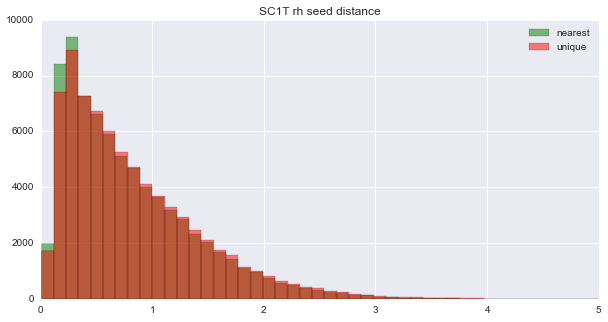

In [188]:
fig = plt.figure(figsize=(10,5))
plt.xlim([0,5])
plt.hist(ideal_seed_dist, label='nearest', alpha=0.5, color='g', bins=500)
plt.hist(actual_seed_dist, label='unique', alpha=0.5, color='r', bins=500)
plt.legend()
plt.title(sub+' '+hemi+' seed distance')

### distribution of labels

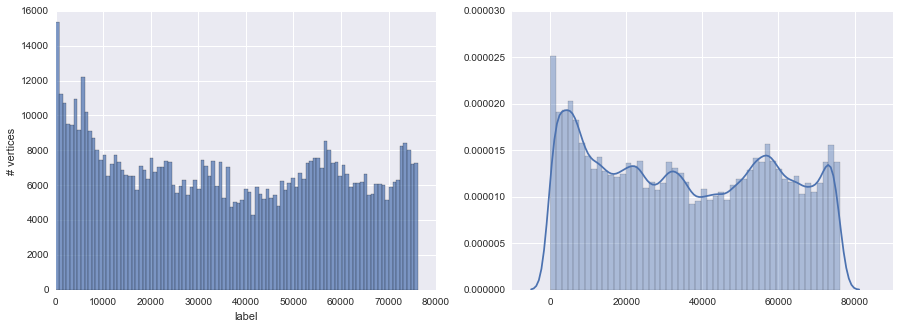

In [46]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
plt.hist(labelling[:,1], bins=100, alpha=0.7)
plt.xlabel('label')
plt.ylabel('# vertices')
fig.add_subplot(122)
sns.distplot(labelling[:,1], )

In [17]:
# count how many of each label
label_count=np.empty((int(labelling[:,1].max()+1),))
for i in range(int(labelling[:,1].max())+1):
   label_count[i] = len(np.where(labelling[:,1]==i)[0])     

In [14]:
print 'min : '+str(np.min(label_count))
print 'max : '+str(np.max(label_count))
print 'mean : '+str(np.mean(label_count))
print 'sdv : '+str(np.std(label_count))

min : 1.0
max : 324.0
mean : 9.09984380947
sdv : 12.0261757416


In [15]:
print 'labels with no vertices : '+str(len(np.where(label_count==0.0)[0]))

labels with no vertices : 0


In [24]:
print 'no label : '+str(len(np.where(labelling[:,1]==-1)[0]))

no label : 0


### largest cluster

In [16]:
max_label = np.where(label_count==np.max(label_count))[0][0]
masked_labelling = np.zeros_like(labelling[:,1])
masked_labelling[labelling[:,1]==max_label] = 1

In [17]:
write_vtk('/scr/ilz3/myelinconnect/all_data_on_simple_surf/qa/%s_%s_max_label.vtk'%(sub, hemi), complex_v, complex_f, 
          data=masked_labelling[:,np.newaxis])

/home/raid3/huntenburg/workspace/brainsurfacescripts/vtk_rw.py:90: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if data!=None:


### every 100s cluster

In [25]:
spaced_labels = np.floor(np.linspace(0,len(label_count), len(label_count)/100))
spaced_labelling = np.zeros_like(labelling[:,1])

count = 1
for l in spaced_labels:
    spaced_labelling[labelling[:,1]==l] = count
    count+=1

In [26]:
write_vtk('/scr/ilz3/myelinconnect/all_data_on_simple_surf/qa/%s_%s_spaced_label.vtk'%(sub, hemi), complex_v, complex_f, 
          data=spaced_labelling[:,np.newaxis])

### clustered labels 

In [27]:
clustered_labels = np.arange(50000, 50050)
clustered_labelling = np.zeros_like(labelling[:,1])
count = 1
for c in clustered_labels:
    clustered_labelling[labelling[:,1]==c] = count
    count+=1

In [28]:
write_vtk('/scr/ilz3/myelinconnect/all_data_on_simple_surf/qa/%s_%s_clustered_label.vtk'%(sub, hemi), complex_v, complex_f, 
          data=clustered_labelling[:,np.newaxis])

### zero labels

In [7]:
zero_labelling = np.zeros_like(labelling[:,1])
for c in list(np.where(label_count==0.0)[0]):
    zero_labelling[labelling[:,1]==c] = 1
write_vtk('/scr/ilz3/myelinconnect/all_data_on_simple_surf/qa/%s_%s_zero_label.vtk'%(sub, hemi), complex_v, complex_f, 
      data=zero_labelling[:,np.newaxis])

/home/raid3/huntenburg/workspace/brainsurfacescripts/vtk_rw.py:90: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if data != None:


### no label

In [18]:
if np.where(labelling[:,1]==-1)[0].shape[0] >0:
    no_labelling = np.zeros_like(labelling[:,1])
    for n in list(np.where(labelling[:,1]==-1)[0]):
        no_labelling[n] = 1
    write_vtk('/scr/ilz3/myelinconnect/all_data_on_simple_surf/qa/%s_%s_no_label.vtk'%(sub, hemi), complex_v, complex_f, 
          data=no_labelling[:,np.newaxis])
else:
    print 'all vertices labelled'

In [14]:
np.where(no_labelling==1)

(array([25146, 25147, 25148, 25149, 25171, 26367, 26397, 26398, 26399,
        26400, 26423, 27587, 27613, 27614, 27615, 27616, 27617, 27618,
        27647, 27648, 27649, 27650, 27672, 28752, 28753, 28773, 30127,
        30128, 30129, 30130, 30143, 31277, 31278, 31279, 31280, 31291,
        31478, 31581, 31582, 31583, 31584, 31599, 32569, 32855, 32856,
        32857, 32858, 32869, 32870, 32871, 32872, 32886, 34263, 34273,
        42706, 42707, 42708, 42709, 42715, 44663]),)

### labelling edges

In [194]:
from graphs import graph_from_mesh

In [196]:
G = graph_from_mesh(complex_v, complex_f)

In [193]:
edge_labelling = np.zeros_like(labelling[:,1])

In [218]:
for v in range(edge_labelling.shape[0]):
    if any(labelling[G.neighbors(v),1] != labelling[v,1]):
        edge_labelling[v] = 1

In [222]:
write_vtk('/scr/ilz3/myelinconnect/all_data_on_simple_surf/qa/%s_%s_edge_label.vtk'%(sub, hemi), complex_v, complex_f, 
          data=edge_labelling[:,np.newaxis])